### **PERFORMING EDA ON TITANIC DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Univariate Analysis On Numerical Col**

###Age
**conclusions**
- Age is almost normally distributed
- 20% values are missing
- there are some outliers


In [ ]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Frequency'>

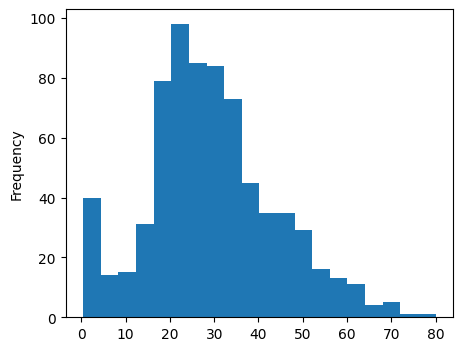

In [ ]:
df['Age'].plot(kind='hist',bins=20,figsize=[5,4])

<Axes: ylabel='Density'>

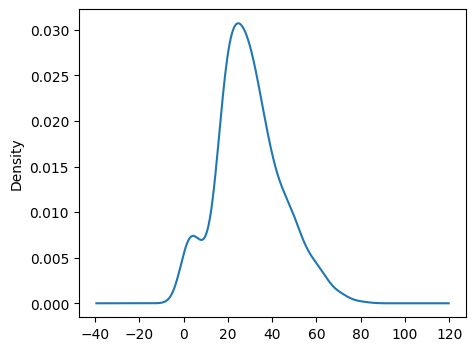

In [ ]:
df['Age'].plot(kind='kde',figsize=[5,4])

<Axes: >

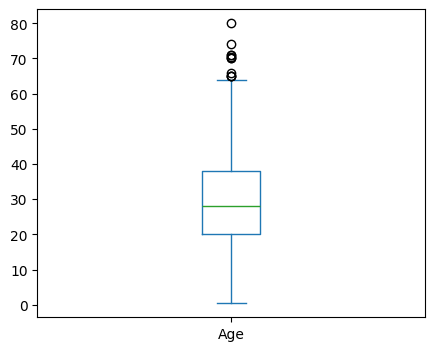

In [ ]:
df['Age'].plot(kind='box',figsize=[5,4])

In [ ]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
df['Age'].isnull().sum()/len(df['Age'])

np.float64(0.19865319865319866)

###Fare
**conclusions**
- the data is positively skewed
- fare col contains the group of farenot the individual fare
- we need to create new col called individual fare

In [ ]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='Frequency'>

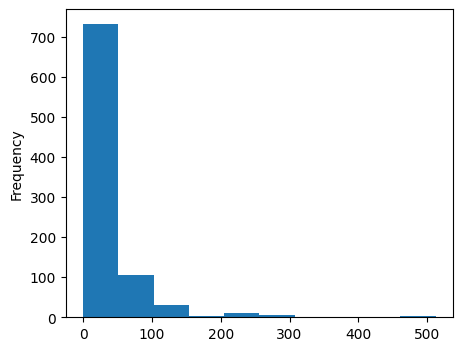

In [ ]:
df['Fare'].plot(kind='hist',figsize=[5,4])

<Axes: ylabel='Density'>

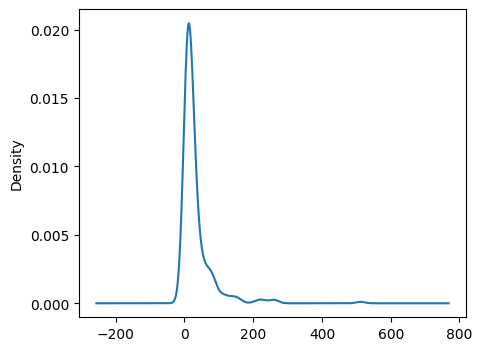

In [ ]:
df['Fare'].plot(kind='kde',figsize=[5,4])

In [ ]:
df['Fare'].skew()

np.float64(4.787316519674893)

<Axes: >

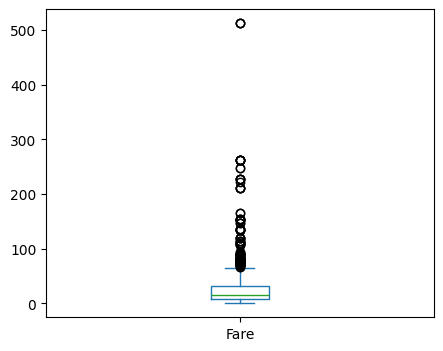

In [ ]:
df['Fare'].plot(kind='box',figsize=[5,4])

In [ ]:
df[df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


# **Univariate Analysis On Categorical Columns**



### Survived
**conclusions**
- more then 60% didn't survived

### Pclass
**conclusions**
- surprisely less people travel in pclass 2 and more people travel in pclass 1

### Sex
**conclusions**
- males are more then females

### SibSp	and Parch
**conclusions**
- SibSp	and Parch cols can be merged to form a new col call family_size
- create new col called is_alone

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: ylabel='count'>

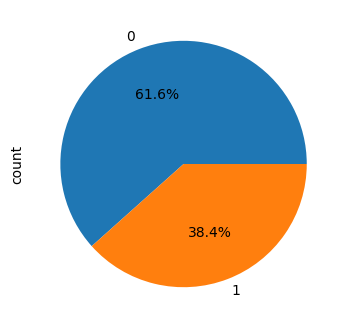

In [ ]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%',figsize=[5,4])

In [ ]:
df['Survived'].isnull().sum()

np.int64(0)

In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: ylabel='count'>

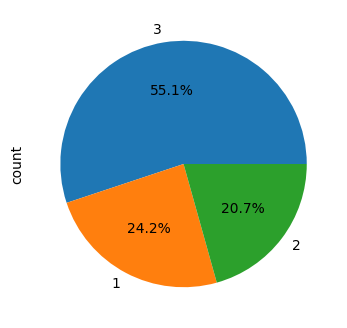

In [ ]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%',figsize=[5,4])

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: ylabel='count'>

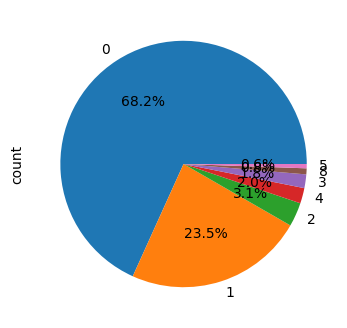

In [ ]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%',figsize=[5,4])

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


# **Univariate Analysis On mixed Columns**
**conclusions**
- need to feature engineer the mix cols to get more insides

# **Bivariate Analysis**

 **Conclusions:-**
- majority people died in pclass 3 and minor people died in pclass 1
- majority of mans died as compared to females
- majority of people are travelling from Cherbourg are pclass1 or females
- if age is in between 0 to 20 then probability of survive is high
- if we are trevelling in small family then probability of surviving is high
- if you are Miss. or Mrs. then there is high probability that you will survived
- percentage of people survived is low on lower decks


In [ ]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

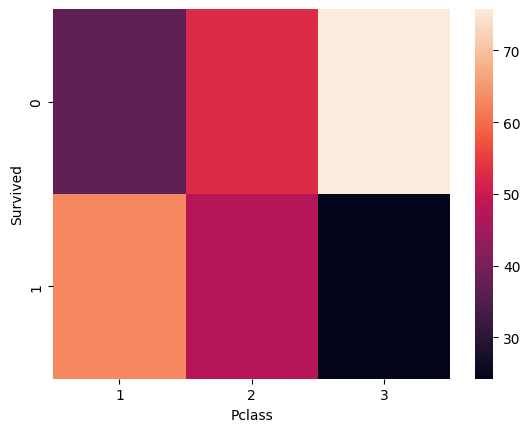

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

In [ ]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [ ]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [ ]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [ ]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


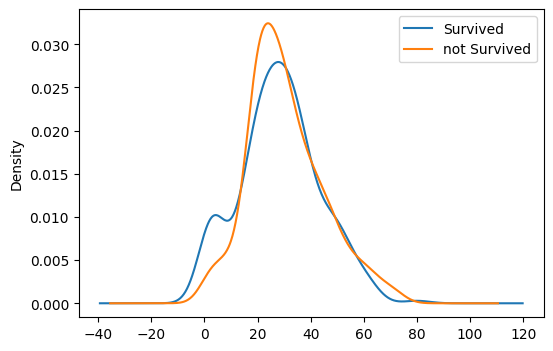

In [ ]:
#survived and age
import matplotlib.pyplot as plt

df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived',figsize=[6,4])
df[df['Survived']==0]['Age'].plot(kind='kde',label='not Survived',figsize=[6,4])
plt.legend()
plt.show()

In [ ]:
df[df['Pclass']==1]['Age'].mean()

np.float64(38.233440860215055)

# **Feature Engineering On Fare, SibSp	and Parch Col**

In [ ]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df[df['Name'].str.contains("sage")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
df_test=pd.read_csv('test.csv')

In [ ]:
df = pd.concat([df,df_test])

In [ ]:
df['individual_fare']= df['Fare']/(df['Parch']+df['SibSp']+1)

<Axes: >

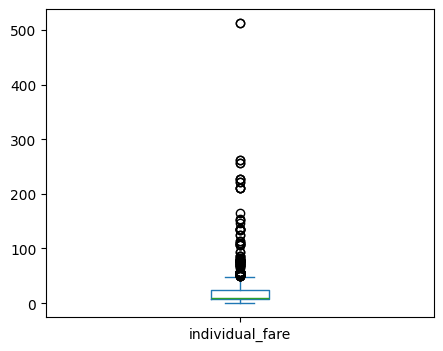

In [ ]:
df['individual_fare'].plot(kind='box',figsize=[5,4])

In [ ]:
df['family_size']=df['Parch']+df['SibSp'] +1

In [ ]:
def Transform_family(num):
  if num==1:
    return 'alone'
  elif num>=2 and num <=5:
    return 'small'
  else:
    return 'big'

In [ ]:
df['family_type']=df['family_size'].apply(Transform_family)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [ ]:
df['surname']=df['Name'].str.split(',').str.get(0)

In [ ]:
df['title']=df['Name'].str.split(',').str.get(1).str.strip().str.split().str.get(0)

In [ ]:
pd.crosstab(df['Survived'],df['title'],normalize='columns')*100

title,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
Survived,,,,,,,,,,,,,,,,,
0.0,100.0,50.0,100.0,57.142857,100.0,0.0,50.0,42.5,30.21978,0.0,0.0,84.332689,20.8,0.0,100.0,0.0,0.0
1.0,0.0,50.0,0.0,42.857143,0.0,100.0,50.0,57.5,69.78022,100.0,100.0,15.667311,79.2,100.0,0.0,100.0,100.0


In [ ]:
replace_dict = {
    'Rev.': 'other',
    'Dr.': 'other',
    'Col.': 'other',
    'Major.': 'other',
    'Capt.': 'other',
    'the': 'other',
    'Ms.': 'other',
    'Mlle.': 'other',
    'Don.': 'other',
    'Mme.': 'other',
    'Sir.': 'other',
    'Dona.': 'other',
    'Lady.': 'other'
}
df['title'] = df['title'].replace(replace_dict)

In [ ]:
df['title'].value_counts()

,count
title,
Mr.,757
Miss.,260
Mrs.,197
Master.,61
other,33
Jonkheer.,1


In [ ]:
pd.crosstab(df['Survived'],df['title'],normalize='columns')*100

title,Jonkheer.,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,,
0.0,100.0,42.5,30.21978,84.332689,20.8,53.846154
1.0,0.0,57.5,69.78022,15.667311,79.2,46.153846


In [ ]:
df['Cabin'].fillna('M',inplace=True)

/tmp/ipython-input-449-3032343573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('M',inplace=True)


In [ ]:
df['deck'] = df['Cabin'].str[0]

In [ ]:
df['deck'].value_counts()

,count
deck,
M,1014
C,94
B,65
D,46
E,41
A,22
F,21
G,5
T,1


In [ ]:
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='deck'>

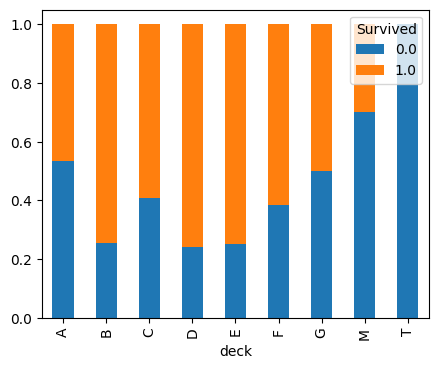

In [ ]:
pd.crosstab(df['deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True,figsize=[5,4])

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.625000,2,small,Braund,Mr.,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1,alone,Heikkinen,Miss.,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.050000,1,alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,M,S,8.050000,1,alone,Spector,Mr.,M
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana,other,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.250000,1,alone,Saether,Mr.,M
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,M,S,8.050000,1,alone,Ware,Mr.,M


<Axes: >

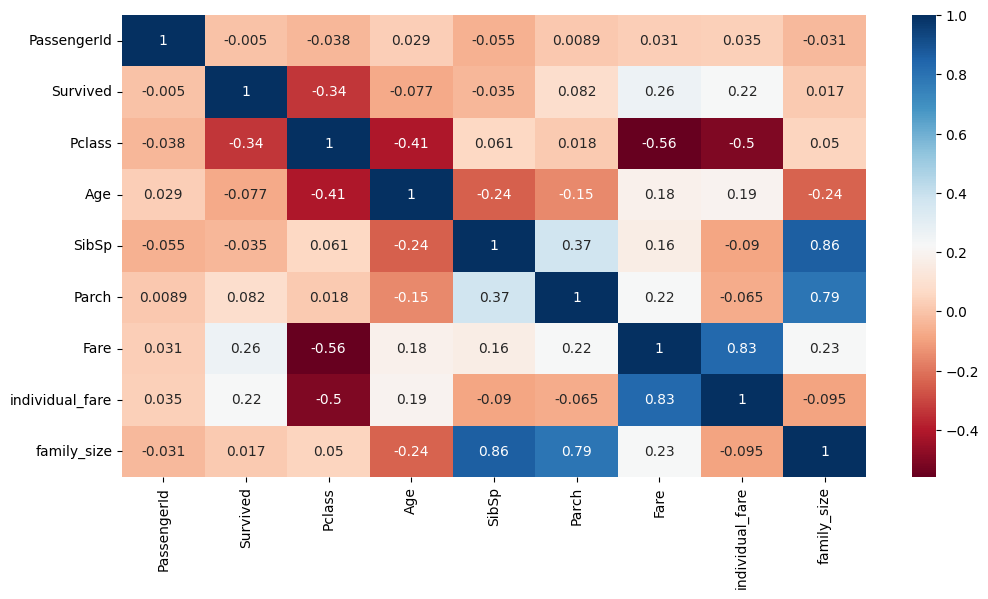

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='RdBu')